<a href="https://colab.research.google.com/github/bernardlawes/vision-train-py/blob/master/notebooks/inference_roboflow_sdk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 Roboflow Inference using the Python SDK (Google Colab)

This notebook uses the **official Roboflow Python SDK**, which is now the recommended way to:
- Authenticate
- Access your hosted project
- Run inference
- Get structured prediction results

✅ More robust than raw API calls  
✅ Easier to upgrade in the future  


In [ ]:
!pip install roboflow

In [20]:
# Use the exact workspace, project, and version from Step 1
workspace = "robo-hello-world"  # Use the exact name from Step 1
project = "shipclassification-rekyf"      # Use the exact name from Step 1
version = 2                          # Use the version number from Step 1

In [21]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt
from roboflow import Roboflow
from google.colab import files
from google.colab import userdata

In [22]:
# Get your API Key
api_key = userdata.get('ROBOFLOW_API_KEY')  # Same API key as in Step 1

print("\n")

# Connect to Roboflow with your API key
rf = Roboflow(api_key=api_key)

# Load your model with the correct values
model = rf.workspace(workspace).project(project).version(version).model

print("\n")

loading Roboflow workspace...
loading Roboflow project...


In [32]:
# Upload and predict on an image
print("\nSelect an image to perform inference on:\n")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Select an image to perform inference on:



Saving 022624-802.webp to 022624-802.webp


In [33]:
# Run inference
predictions = model.predict(image_path, confidence=40, overlap=30).json()

# Print prediction results
print("\nPrediction Results:\n")
print(predictions)
print("\n")


Prediction Results:

{'predictions': [{'x': 1051, 'y': 652, 'width': 1659, 'height': 799, 'confidence': 0.7573426365852356, 'class': 'Container Ship', 'class_id': 0, 'detection_id': '78cd291d-af02-4f1e-b8a2-620bbf4ec745', 'image_path': '022624-802.webp', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '2309', 'height': '1299'}}




In [34]:
# Load and display the image with bounding boxes
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("\nImage Loaded\n")


Image Loaded



In [36]:
# Draw bounding boxes
for prediction in predictions["predictions"]:
    # Extract coordinates
    x1 = prediction["x"] - prediction["width"] / 2
    y1 = prediction["y"] - prediction["height"] / 2
    x2 = prediction["x"] + prediction["width"] / 2
    y2 = prediction["y"] + prediction["height"] / 2

    # Draw rectangle
    cv2.rectangle(
        image,
        (int(x1), int(y1)),
        (int(x2), int(y2)),
        (0, 255, 0),
        2
    )

    # Add label
    label = f"{prediction['class']}: {prediction['confidence']:.2f}"
    cv2.putText(
        image,
        label,
        (int(x1), int(y1 - 10)),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (0, 255, 0),
        2
    )

    print("\nBounding Box(es) Drawn\n")


Displaying Image



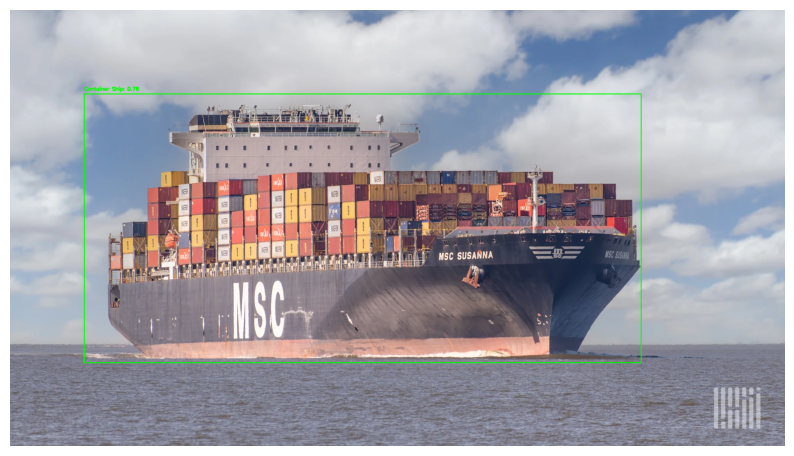

In [40]:
print("\nDisplaying Annotated Image\n")

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()